In [16]:
!pip install pymysql
!pip install pymssql

import LibData
import LibUtils
import LibML
import LibFile

import pandas as pd
import numpy as np

#jobName = '201216_Train_pilot'
jobName = '201216_Train_split1'
x, y = LibData.GetXY_s_o(jobName)

# ov 컬럼 생성
y['pv_ov'] = y.apply(lambda line: line['pv_fee'] - line['pv_claim'], axis=1)

l_x, l_y = LibData.GetSplited(x, y, 5)


In [ ]:
# from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from xgboost import XGBRegressor

# xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.2)

# 주의 max_delta_step 0으로 해야함, 이상이면 학습이 안됨

# fee
model_f = XGBRegressor(max_delta_step=0.0, objective = 'reg:squarederror', nthread=-1,
                     n_estimators = 5000, colsample_bytree=0.9168,learning_rate=0.1284,max_depth=20,min_child_weight=5,subsample=0.4541)
# claim
model_c = XGBRegressor(max_delta_step=0.0, objective = 'reg:squarederror', nthread=-1,
                     n_estimators = 5000, colsample_bytree=0.9168,learning_rate=0.1284,max_depth=20,min_child_weight=5,subsample=0.4541)
# ov
model_ov = XGBRegressor(max_delta_step=0.0, objective = 'reg:squarederror', nthread=-1,
                     n_estimators = 5000, colsample_bytree=0.9168,learning_rate=0.1284,max_depth=20,min_child_weight=5,subsample=0.4541)

mae_c = LibML.GetMaesCV(l_x, l_y, model_c, 'pv_claim')
mae_ov = LibML.GetMaesCV(l_x, l_y, model_ov, 'pv_ov')

LibUtils.WriteNote('prediction ov', 'xgBoost', ['claim : ', mae_c, 'ov : ', mae_ov])
LibUtils.ELoop()

# 예측
yPred_c = pd.Series(model_c.predict(xVal), index=xVal.index)
yPred_c_modi = yPred_c.apply(lambda x: 0.0 if x < 0.0 else x) # 0이하로 예측한 것은 0으로 맞춰줌
yPred_ov = pd.Series(model_ov.predict(xVal), index=xVal.index)

# print(LibUtils.GetScores(yVal['pv_fee'], y_pred_fee))
# print(LibUtils.GetScores(yVal['pv_fee'], y_pred_fee_modi))
print(LibUtils.GetScores(yVal['pv_claim'], yPred_c))
print(LibUtils.GetScores(yVal['pv_claim'], yPred_c_modi))
print(LibUtils.GetScores(yVal['pv_ov'], yPred_ov))


KeyboardInterrupt: ignored

In [ ]:
# 예측
yPred_c = pd.Series(model_c.predict(xVal), index=xVal.index)
yPred_c_modi = yPred_c.apply(lambda x: 0.0 if x < 0.0 else x) # 0이하로 예측한 것은 0으로 맞춰줌
yPred_ov = pd.Series(model_ov.predict(xVal), index=xVal.index)

# print(LibUtils.GetScores(yVal['pv_fee'], y_pred_fee))
# print(LibUtils.GetScores(yVal['pv_fee'], y_pred_fee_modi))
print(LibUtils.GetScores(yVal['pv_claim'], yPred_c))
print(LibUtils.GetScores(yVal['pv_claim'], yPred_c_modi))
print(LibUtils.GetScores(yVal['pv_ov'], yPred_ov))

NameError: ignored

[128.22683044621792, 0.15115216005229973, 0.9146740591265221]
[124.07199109145252, 0.14625448816134162, 0.9150815946112208]


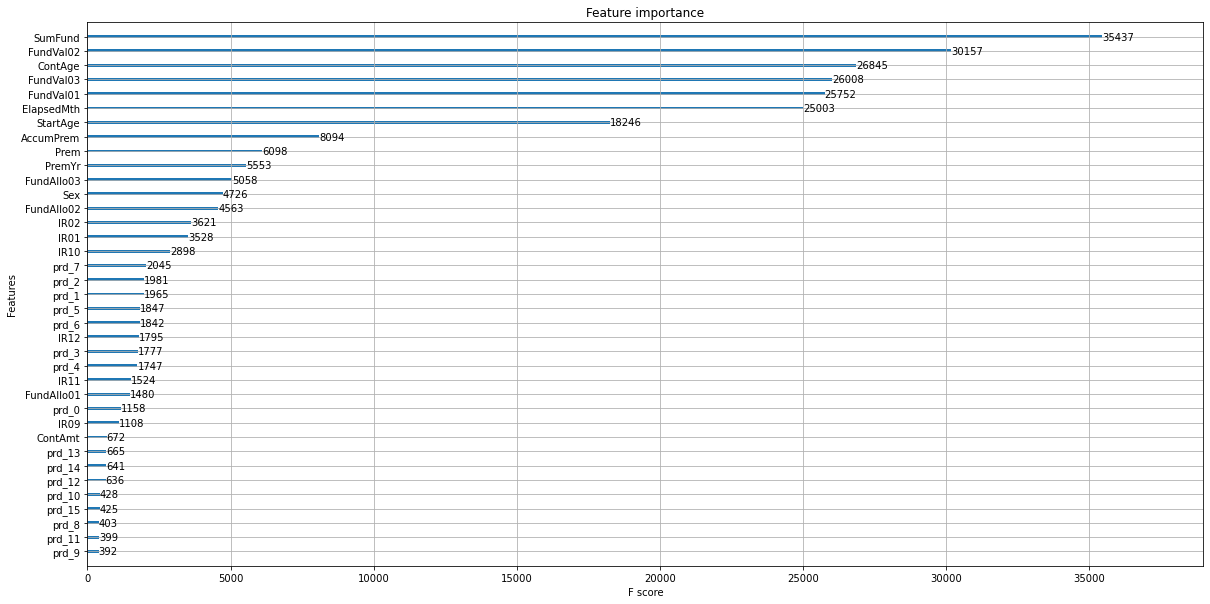

In [ ]:
plot_importance(model2)
#plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [ ]:
print(model.feature_importances_)

[1.34185608e-02 1.94731895e-02 2.03991067e-02 6.79283291e-02
 1.78563446e-02 1.26061574e-01 1.11107506e-01 1.54107418e-02
 2.13504005e-02 1.54458964e-03 3.05392593e-03 8.01669899e-03
 5.92441880e-04 2.83594988e-03 4.88059176e-03 1.18160632e-03
 1.51675008e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.10311108e-04
 3.15714255e-03 3.80961187e-02 1.62544310e-01 0.00000000e+00
 0.00000000e+00 3.21610123e-02 6.55100718e-02 7.95187205e-02
 6.80374354e-02 2.88275201e-02 3.25108953e-02 2.63114441e-02
 2.46457849e-02 1.56265320e-04 1.27834646e-04 7.93237778e-05
 1.18789671e-04 3.25735600e-04 2.19776877e-04 2.56641622e-04
 1.56476075e-04]


In [ ]:
pd.concat([pd.Series(xVal.columns), pd.Series(model2.feature_importances_)], axis=1)

,0,1
0,ElapsedMth,0.004907
1,ContAge,0.008002
2,Sex,0.003752
3,Prem,0.006268
4,PremYr,0.052693
5,AccumPrem,0.024093
6,ContAmt,0.145714
7,StartAge,0.008492
8,SumFund,0.041040
9,FundVal01,0.000167


In [ ]:
!pip install xgboost
from xgboost import plot_importance
from xgboost import XGBRegressor
import pandas as pd
import LibUtils
import datetime

def Fit(xTrain, yTrain, xVal,
        learning_rate, n_estimators, max_depth, subsample, colsample_bytree, min_child_weight, max_delta_step, gamma, cvCnt):
    model = XGBRegressor(learning_rate = learning_rate,
                        n_estimators = int(n_estimators),
                        max_depth = int(max_depth),
                        subsample = subsample,
                        colsample_bytree = colsample_bytree,
                        min_child_weight = min_child_weight,
                        max_delta_step = max_delta_step,
                        gamma = gamma
                        objective = 'reg:squarederror')    
    # 주의 max_delta_step 0으로 해야함, 이상이면 학습이 안됨

    model.fit(xTrain, yTrain)
    y_pred = pd.Series(model.predict(xVal), index=xVal.index)
    return model, y_pred

# 탐색 대상 함수 (XGBRegressor)
def Fit_cv(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, min_child_weight, max_delta_step, gamma, cvCnt):

    # 모델 정의
    model, y_pred = Fit(xTrain, yTrain['pv_claim'], xVal,
                        learning_rate, n_estimators,
                        max_depth, subsample,
                        colsample_bytree, min_child_weight,
                        max_delta_step, gamma)
    
    # 모델 훈련
    model.fit(x, y['pv_claim'])

    # 예측값 출력
    y_pred= model.predict(x)

    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(y['pv_claim'], y_pred))
    r2 = r2_score(y['pv_claim'], y_pred)
    mape = mean_absolute_percentage_error(y['pv_claim'], y_pred)

    # 오차 최적화로 사용할 metric 반환
    return r2



start = datetime.datetime.now()
print("start time : " + start.strftime('%Y-%m-%d %H:%M:%S'))

model_1, y_pred_1 = Fit(xTrain, yTrain['pv_fee'], xVal)
middle = datetime.datetime.now()
print("dur1 : " + str(middle - start))

model_2, y_pred_2 = Fit(xTrain, yTrain['pv_claim'], xVal)
end = datetime.datetime.now()
print("dur2 : " + str(end-middle))
print("end time : " + end.strftime('%Y-%m-%d %H:%M:%S'))

LibUtils.ELoop()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 24)